In [4]:
install.packages('cowplot')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Important equations
Full width at half maximum:
$$
\text{FWHM} = \sqrt{w_{d}^{2} + w_{e}^2}
$$


Device resolution
$$
w_d = 2\sqrt{\left(2\ln 2\right) \cdot F \cdot E_{\gamma} \cdot w}
$$

# Initialize libs, data, useful functions

In [1]:
library(tidyverse)
library(cowplot)
library(magrittr)
fig <- function(width, height){
     options(repr.plot.width = width, repr.plot.height = height)
}

th_path = 'data/IC48A_Th.txt'
AmCsCo_path = 'data/IC48A_AmCsCo.txt'

th_data = read.table(th_path, col.names = c('Ch', 'counts'))
th_peaks = c(238.632, 300.089, 510.74, 583.187, 727.330, 763.45, 785.37, 860.53, 893.408, 1078.63, 1512.70, 1592.511, 1620.738, 2103.511, 2614.511)

acc_data = read.table(AmCsCo_path, col.names = c('Ch', 'counts'))
acc_peaks = c(59.5409, 661.657, 1173.228, 1332.492, 2505.69)

calc_fwhm <- function(wd, we) {
    return(sqrt(wd^2 + we^2))
}

calc_wd <- function(fano, E_ph, w) {
    return(2*sqrt(2*log(2)*fano*E_ph*w))
}

── Attaching packages ───────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



# Plot raw data

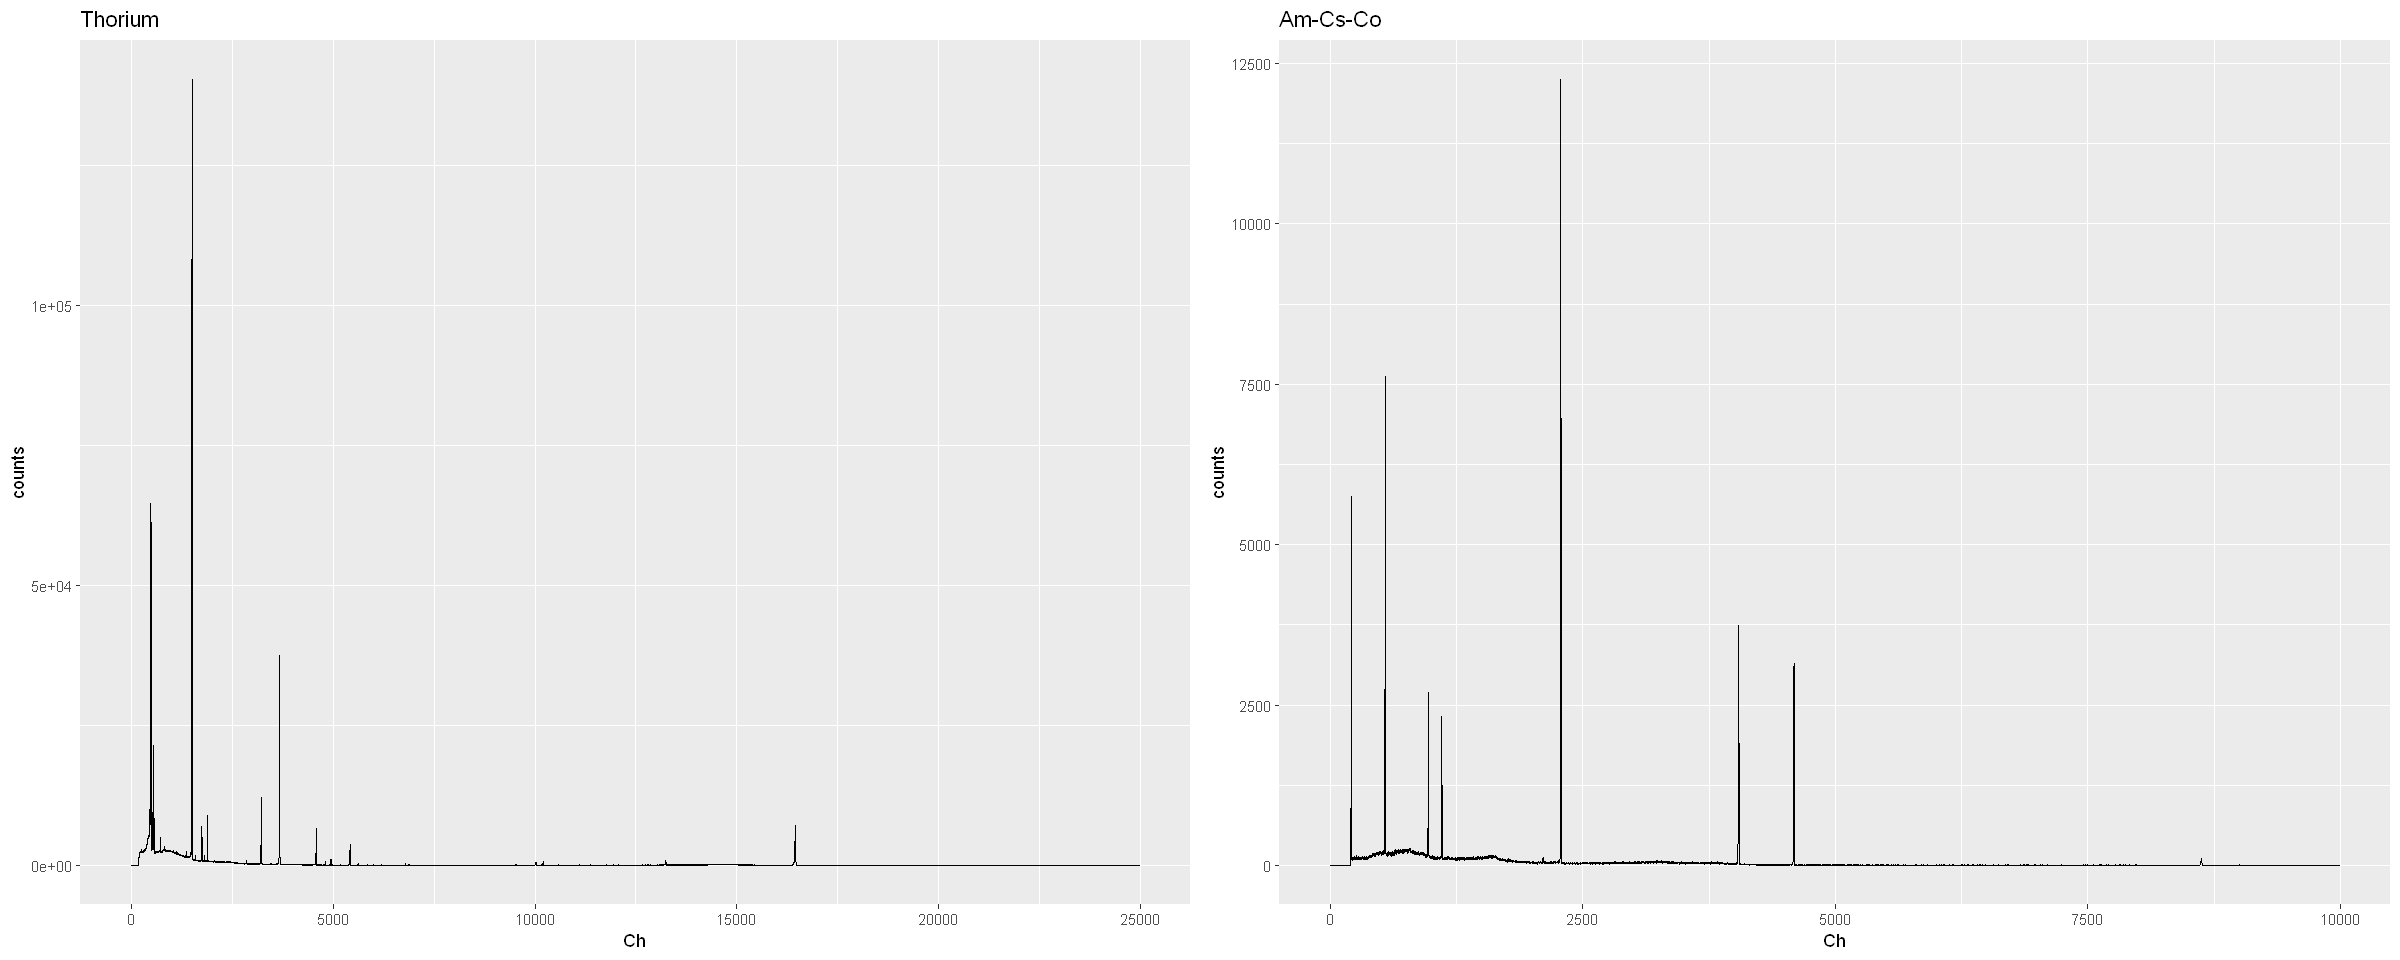

In [3]:
fig(20,8)
p_th = ggplot(data = th_data, mapping = aes(x = Ch, y = counts)) + 
    geom_line() +
    ggtitle('Thorium')
p_acc = ggplot(data = acc_data, mapping = aes(x = Ch, y = counts)) + 
    geom_line() +
    ggtitle('Am-Cs-Co')

plot_grid(p_th, p_acc)

In [2]:
range_size <- function(data){
    return(max(data) - min(data))    
}

peak_shift <- function(peak_array){
    peak_idx <- which.max(peak_array)
    
    #centered_peak <- vector(length = 1, mode = 'double')
    centered_peak <- c(peak_array[(peak_idx-10):(peak_idx+10)])
    return(centered_peak)
}

probe_peaks <- function(data, n.pts){
    data_range <- split(data$counts, ceiling(row(data)/n.pts))
    ranges <- lapply(data_range, range_size)
    peaks <- data_range[ranges > 1500]
    l <- lapply(peaks, peak_shift)
    centered_peaks <- data.frame(matrix(unlist(l), ncol=length(l)))
    centered_peaks$x_vals <- c(1:nrow(centered_peaks))
    return(centered_peaks)
}

In [3]:
centered_peaks <- probe_peaks(acc_data, 80) %>% pivot_longer(!x_vals, values_to = c('counts'), names_to='peak')

Warning message in split.default(data$counts, ceiling(row(data)/n.pts)):
“data length is not a multiple of split variable”Warning message in matrix(unlist(l), ncol = length(l)):
“data length [146] is not a sub-multiple or multiple of the number of rows [21]”

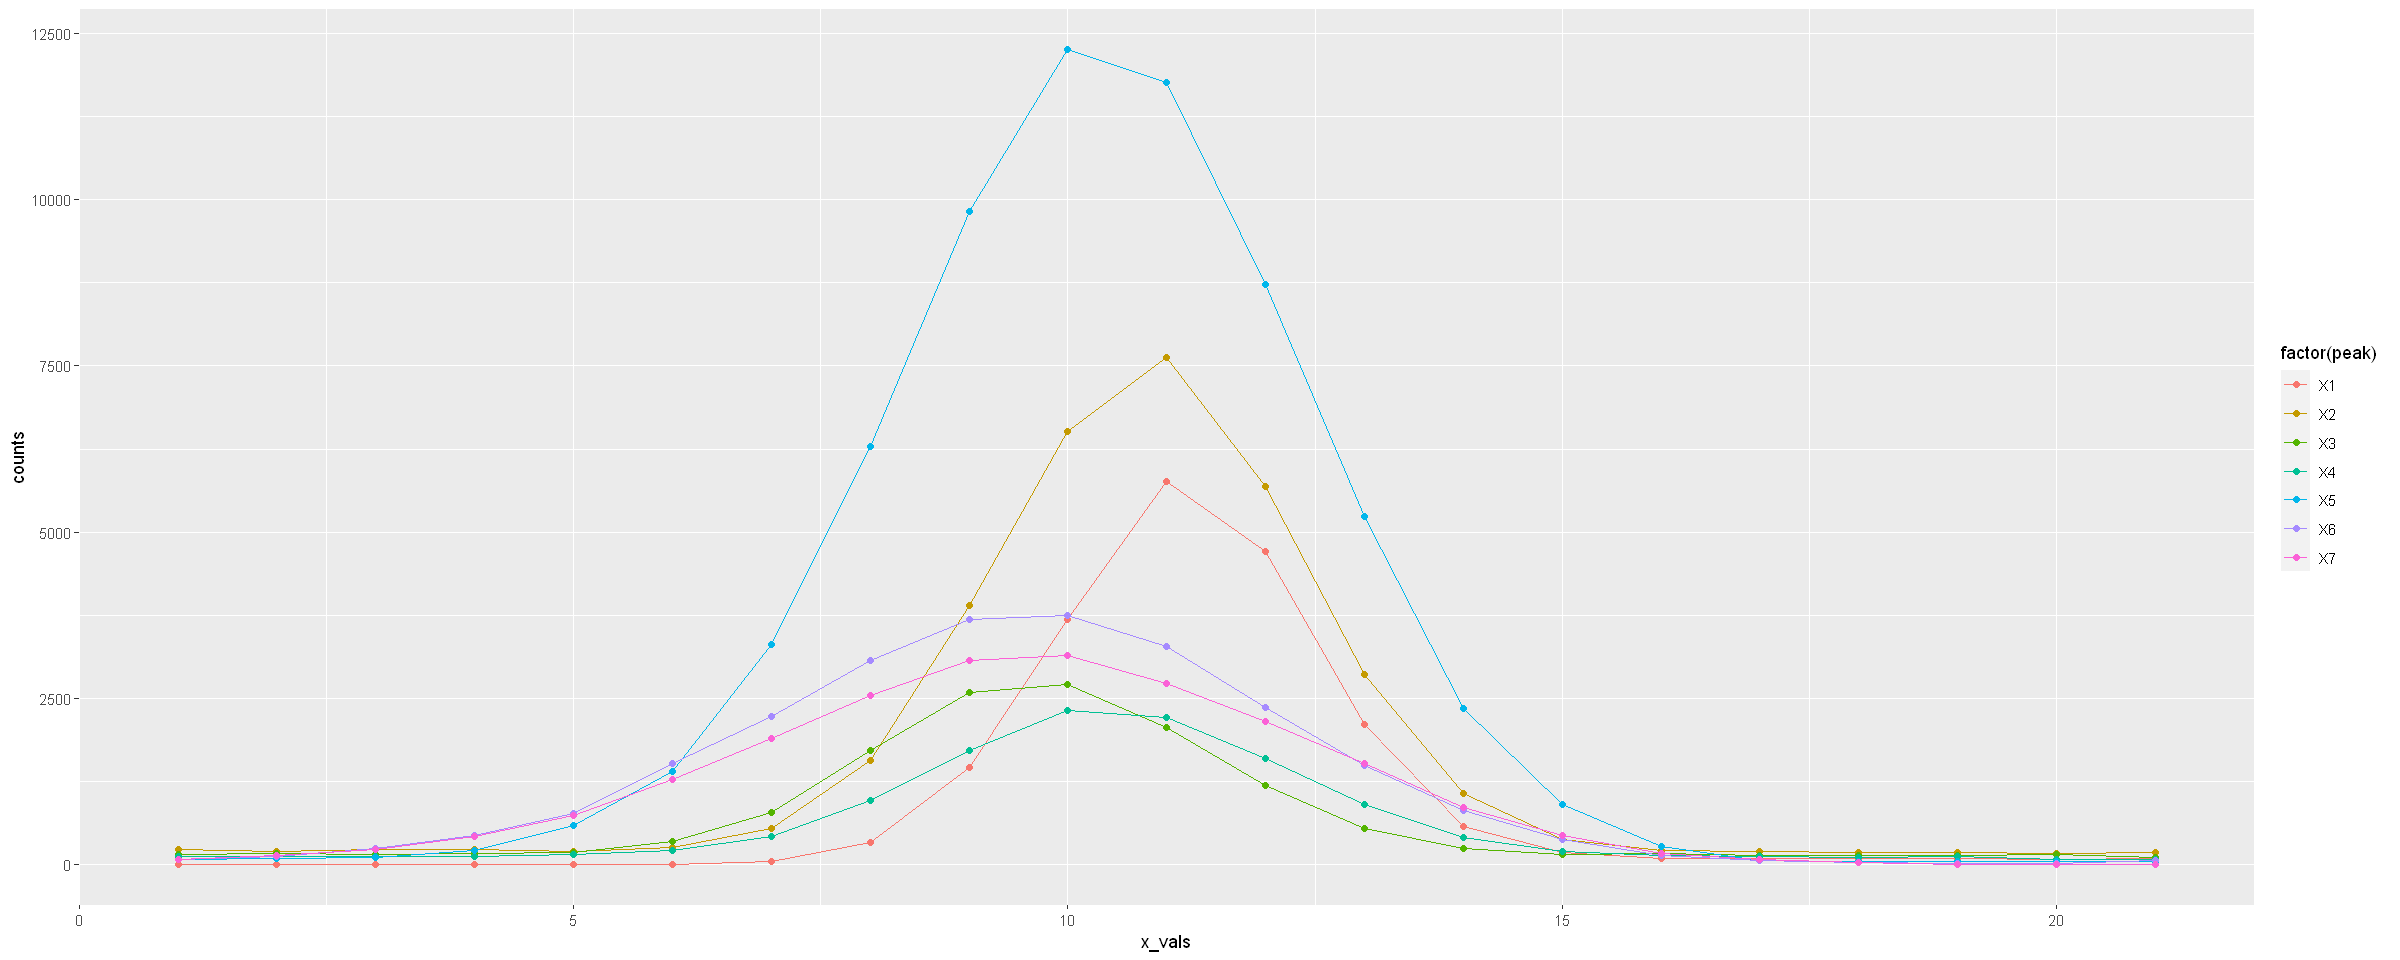

In [6]:
ggplot(data = centered_peaks, mapping = aes(x = x_vals, y = counts, color = factor(peak))) + geom_line() + geom_point()